# Simple Moving Average(SMA)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Here I have taken a dataset of Oracle’s stock prices for year 2000

In [2]:
# Importing Dataset
data = pd.read_csv("Data.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj. Close
0,13-02-2016,382.25,389.35,380.52,387.90,7711.179508,387.90
1,14-02-2016,387.90,401.22,386.85,400.45,8665.212039,400.45
2,15-02-2016,400.45,409.71,396.00,401.15,9113.796236,401.15
3,16-02-2016,401.00,407.80,393.40,405.53,7808.708875,405.53
4,17-02-2016,406.48,420.00,403.96,418.84,9914.200931,418.84


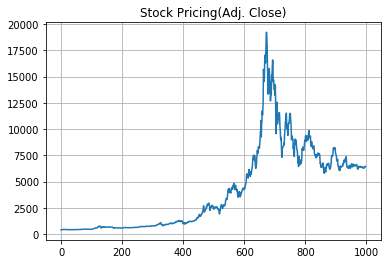

In [3]:
# Plotting Adjust Close
data["Adj. Close"].plot(grid = True)
plt.title("Stock Pricing(Adj. Close)")
plt.show()

#### I have defined my short-term and long-term windows to be 20 and 80 days respectively. Next, created a new Pandas dataframe named "signals" and a 'signal' column in which all rows are initially assigned a value zero. Then created columns in the "signal" dataframe to store the SMA (Short Moving Average) and LMA (Long Moving Avarage). To do this simultaneously , I used .rolling() and .mean() methods. 

#### Finally created a trading signal. Used np.where(), a conditional statement that states: Any day the SMA is greater than the LMA for 40 days (duration of the short window),  a signal will be triggered and set to a value of "1". Otherwise, the signal value remains at zero.

In [4]:
# Making short and Long windows
short_window = 20
long_window = 80

# Create signals
signals = pd.DataFrame(index = data.index)
signals['signal'] = 0.0

# SMA of Short Window
signals['short_mavg'] = data['Adj. Close'].rolling(window = short_window, min_periods = 1, center = False).mean()

# SMA of Long Window
signals['long_mavg'] = data['Adj. Close'].rolling(window = long_window, min_periods = 1, center = False).mean()

# Create singals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                          >signals['long_mavg'][short_window:], 1.0, 0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

     signal   short_mavg    long_mavg  positions
0       0.0   387.900000   387.900000        NaN
1       0.0   394.175000   394.175000        0.0
2       0.0   396.500000   396.500000        0.0
3       0.0   398.757500   398.757500        0.0
4       0.0   402.774000   402.774000        0.0
5       0.0   405.226667   405.226667        0.0
6       0.0   407.271429   407.271429        0.0
7       0.0   410.112500   410.112500        0.0
8       0.0   412.417778   412.417778        0.0
9       0.0   414.928000   414.928000        0.0
10      0.0   415.561818   415.561818        0.0
11      0.0   416.261667   416.261667        0.0
12      0.0   416.736154   416.736154        0.0
13      0.0   417.290714   417.290714        0.0
14      0.0   418.232667   418.232667        0.0
15      0.0   419.145625   419.145625        0.0
16      0.0   420.138235   420.138235        0.0
17      0.0   420.834444   420.834444        0.0
18      0.0   421.342105   421.342105        0.0
19      0.0   421.35

### Using Matplotlib, a scatterplot with all the elements created above are plotted

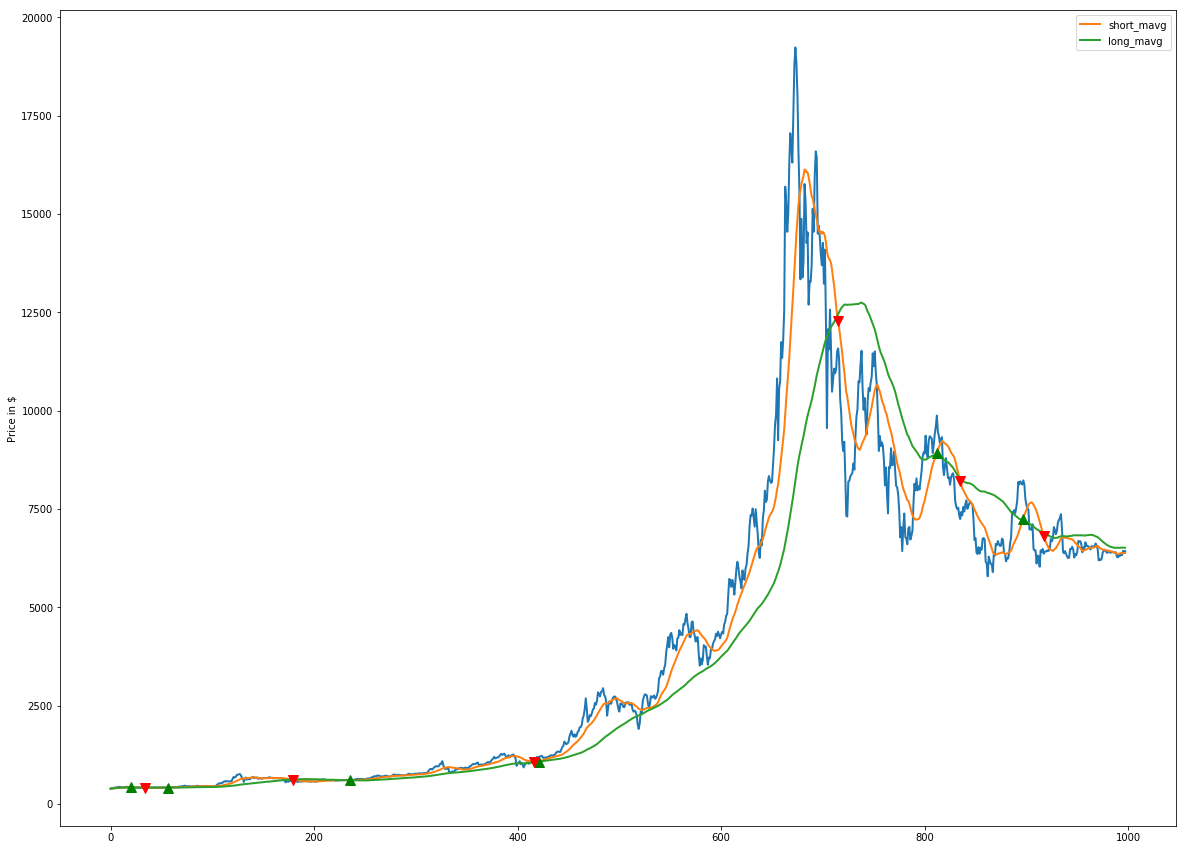

In [5]:
# Initialize the plot figure
fig = plt.figure(figsize = (20, 15))

# Add a subplot and lable for y-axis
ax1 = fig.add_subplot(111, ylabel = "Price in $")

# Plot the Adj. Close
data['Adj. Close'].plot(ax = ax1, lw = 2.)

# Plot the shor and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax = ax1, lw = 2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
        signals.short_mavg[signals.positions == 1.0],
        '^', markersize = 10, color = 'g')

# Plot the shell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
        signals.short_mavg[signals.positions == -1.0],
        'v', markersize = 10, color = 'r')

# Show the plot
plt.show()